In [1]:
import torch.utils
import torch.distributions
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision

from utils.train import *
from models import *

root = '.'

In [2]:
torch.manual_seed(0)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Test siemense

In [4]:
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'tmp'
batch_size = 64
epochs = 300
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, _ in zip(range(1), range(1)):

    model = SiameseNetwork(normalize).to(device)
    optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index, root)


Epoch [1/300], Train: avg_loss: 1.8741, Validation: avg_loss: 1.2307
Epoch [2/300], Train: avg_loss: 1.0592, Validation: avg_loss: 0.7915
Epoch [3/300], Train: avg_loss: 0.8358, Validation: avg_loss: 0.7490
Epoch [4/300], Train: avg_loss: 0.5836, Validation: avg_loss: 0.7198
Epoch [5/300], Train: avg_loss: 0.5066, Validation: avg_loss: 0.5597
Epoch [6/300], Train: avg_loss: 0.5562, Validation: avg_loss: 0.5516
Epoch [7/300], Train: avg_loss: 0.4619, Validation: avg_loss: 0.4449
Epoch [8/300], Train: avg_loss: 0.5132, Validation: avg_loss: 0.4481
Epoch [9/300], Train: avg_loss: 0.6122, Validation: avg_loss: 0.4664
Epoch [10/300], Train: avg_loss: 0.4964, Validation: avg_loss: 0.4788
Epoch [11/300], Train: avg_loss: 0.4614, Validation: avg_loss: 0.4641
Epoch [12/300], Train: avg_loss: 0.4682, Validation: avg_loss: 0.4910
Epoch [13/300], Train: avg_loss: 0.4637, Validation: avg_loss: 0.4202
Epoch [14/300], Train: avg_loss: 0.4294, Validation: avg_loss: 0.4266
Epoch [15/300], Train: avg_lo

: 

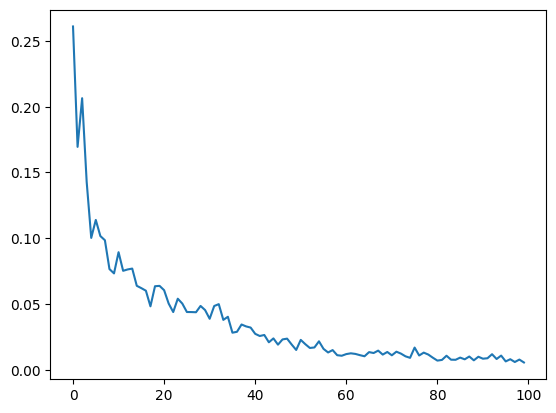

In [5]:
"""losses_scores = {
        'criterion_loss_train': criterion_loss_train,
        'l1_loss_train': l1_loss_train,
        'l2_loss_train': l2_loss_train,
        'train_loss_train': training_loss_train,
        'criterion_loss_val': criterion_loss_val,
        'l1_loss_val': l1_loss_val,
        'l2_loss_val': l2_loss_val,
        'validation_loss_val': validation_loss_val,
    }"""
show_plot(range(epochs), losses_scores['train_loss_train'])

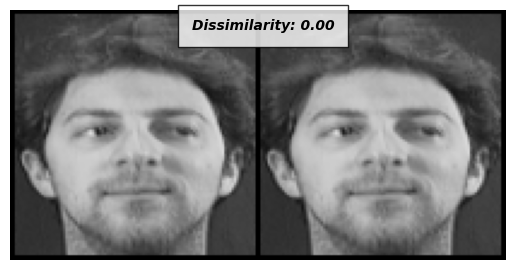

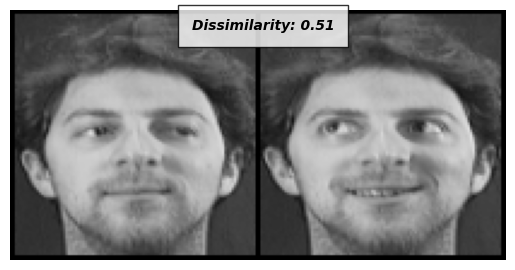

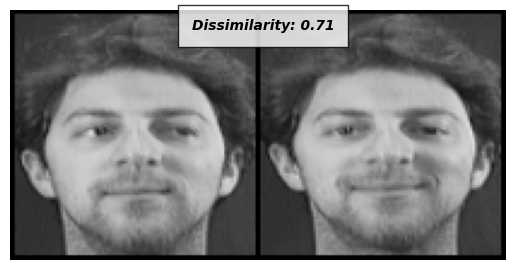

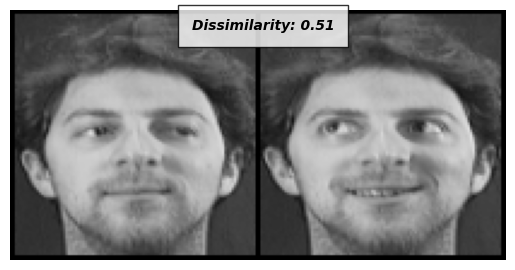

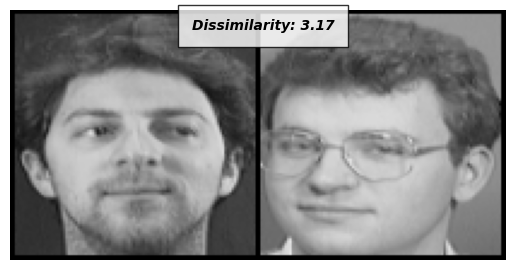

In [ ]:
# Określenie ścieżki do katalogu ze zbiorem testowym i wczytanie go do obiektu klasy Dataloader
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                        transforms.ToTensor()])


folder_dataset_test = datasets.ImageFolder(root="./data/faces/testing/")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, batch_size=1, shuffle=True)

# Uzyskanie obrazu do przeprowadzenia ewaluacji
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(5):
    # Iteracja po 5 obrazach i sprawdzenie ich podobieństwa z pierwszym obrazem (x0)
    _, x1, label2 = next(dataiter)

    # Konkatenacja dwóch przykładowych obrazów
    concatenated = torch.cat((x0, x1), 0)

    output1, output2 = model(x0.to(device), x1.to(device))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

# Test triplet

In [3]:
model_name = 'triplet'
triplet = True
normalize=False
exp_title = 'tmp'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = TripletLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, _ in zip(range(1), range(1)):
    model = TripletNetwork(normalize).to(device)
    optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    do_exp(model, train_loader, val_loader, device, criterion, optimizer, l1_weight, 
           weight_decay, epochs, lr, batch_size, loss_type, triplet, margin, same_person_prob, 
           model_name, exp_title, exp_index, root)


Epoch [1/100], Train: avg_loss: 1.9509, Validation: avg_loss: 1.9314
Epoch [2/100], Train: avg_loss: 1.7277, Validation: avg_loss: 1.8815
Epoch [3/100], Train: avg_loss: 1.8321, Validation: avg_loss: 1.5519
Epoch [4/100], Train: avg_loss: 1.6611, Validation: avg_loss: 1.9951
Epoch [5/100], Train: avg_loss: 1.9904, Validation: avg_loss: 1.9780
Epoch [6/100], Train: avg_loss: 1.9689, Validation: avg_loss: 1.9415
Epoch [7/100], Train: avg_loss: 1.7771, Validation: avg_loss: 1.7466
Epoch [8/100], Train: avg_loss: 1.8365, Validation: avg_loss: 1.8791
Epoch [9/100], Train: avg_loss: 1.7438, Validation: avg_loss: 1.3230
Epoch [10/100], Train: avg_loss: 1.6161, Validation: avg_loss: 1.8241
Epoch [11/100], Train: avg_loss: 1.7365, Validation: avg_loss: 1.7024
Epoch [12/100], Train: avg_loss: 1.4397, Validation: avg_loss: 1.2202
Epoch [13/100], Train: avg_loss: 1.4156, Validation: avg_loss: 1.9883
Epoch [14/100], Train: avg_loss: 1.9855, Validation: avg_loss: 1.9765
Epoch [15/100], Train: avg_lo

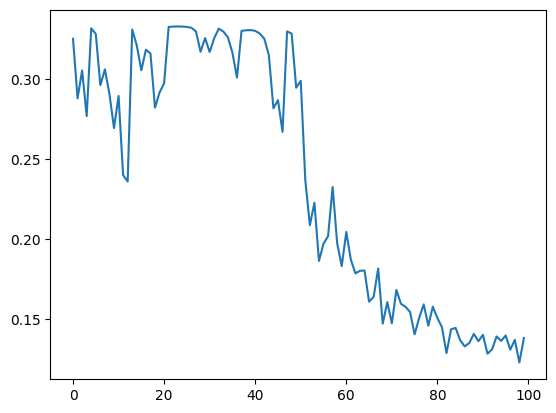

In [4]:
"""losses_scores = {
        'criterion_loss_train': criterion_loss_train,
        'l1_loss_train': l1_loss_train,
        'l2_loss_train': l2_loss_train,
        'train_loss_train': training_loss_train,
        'criterion_loss_val': criterion_loss_val,
        'l1_loss_val': l1_loss_val,
        'l2_loss_val': l2_loss_val,
        'validation_loss_val': validation_loss_val,
    }"""
show_plot(range(epochs), losses_scores['train_loss_train'])

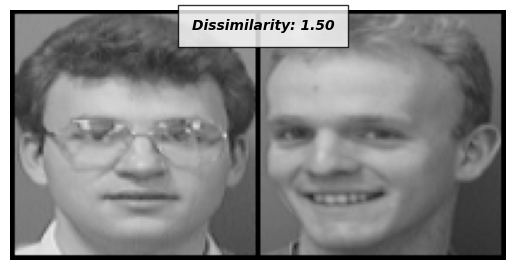

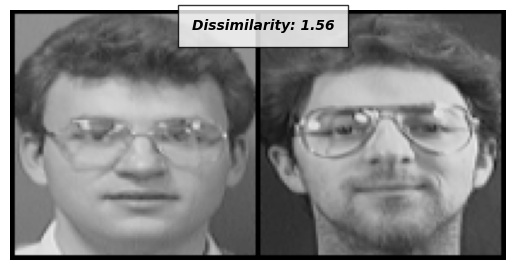

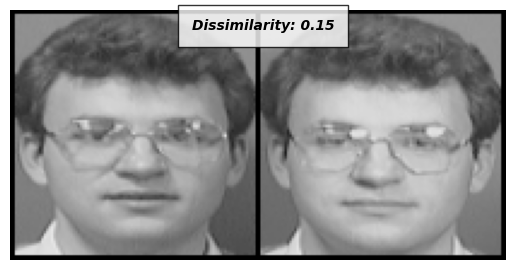

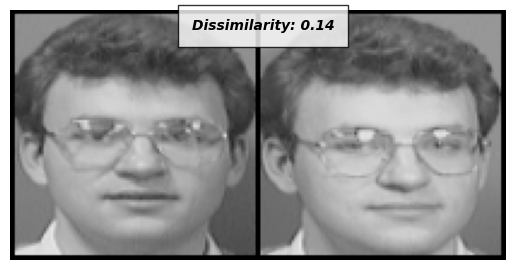

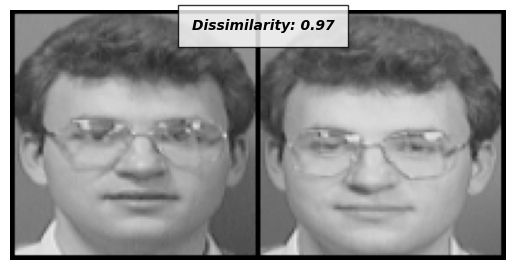

In [11]:
# Określenie ścieżki do katalogu ze zbiorem testowym i wczytanie go do obiektu klasy Dataloader
transformation = transforms.Compose([transforms.Resize((100, 100)),
                                        transforms.ToTensor()])


folder_dataset_test = datasets.ImageFolder(root="./data/faces/testing/")
siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset_test,
                                        transform=transformation)
test_dataloader = DataLoader(siamese_dataset, batch_size=1, shuffle=True)

# Uzyskanie obrazu do przeprowadzenia ewaluacji
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(5):
    # Iteracja po 5 obrazach i sprawdzenie ich podobieństwa z pierwszym obrazem (x0)
    _, x1, label2 = next(dataiter)

    # Konkatenacja dwóch przykładowych obrazów
    concatenated = torch.cat((x0, x1), 0)

    output1, output2, output3 = model(x0.to(device), x1.to(device), x1.to(device))
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

# Test optimizer

In [3]:

model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_optimizers'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizers = [torch.optim.Adam, torch.optim.RAdam, torch.optim.NAdam, torch.optim.AdamW, torch.optim.RMSprop, torch.optim.Adamax]

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, optimizer in enumerate(optimizers):
    
    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    #model, losses_scores, execution_time = train(model, train_loader, val_loader, device, criterion, 
    #                                             optimizer, l1_weight, weight_decay, epochs, triplet)
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
           same_person_prob, model_name, exp_title, exp_index, root)

model_name = 'triplet'
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
triplet = True
counter = len(optimizers)

for exp_index, optimizer in enumerate(optimizers):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)


Epoch [1/100], Train: avg_loss: 1.8595, Validation: avg_loss: 1.1119
Epoch [2/100], Train: avg_loss: 1.0760, Validation: avg_loss: 0.7646
Epoch [3/100], Train: avg_loss: 1.0062, Validation: avg_loss: 0.8057
Epoch [4/100], Train: avg_loss: 0.7786, Validation: avg_loss: 0.7401
Epoch [5/100], Train: avg_loss: 0.7657, Validation: avg_loss: 0.7186
Epoch [6/100], Train: avg_loss: 0.7952, Validation: avg_loss: 0.6163
Epoch [7/100], Train: avg_loss: 0.6246, Validation: avg_loss: 0.7037
Epoch [8/100], Train: avg_loss: 0.6367, Validation: avg_loss: 0.5232
Epoch [9/100], Train: avg_loss: 0.5625, Validation: avg_loss: 0.4634
Epoch [10/100], Train: avg_loss: 0.5074, Validation: avg_loss: 0.5032
Epoch [11/100], Train: avg_loss: 0.5224, Validation: avg_loss: 0.4992
Epoch [12/100], Train: avg_loss: 0.4575, Validation: avg_loss: 0.5564
Epoch [13/100], Train: avg_loss: 0.4716, Validation: avg_loss: 0.5378
Epoch [14/100], Train: avg_loss: 0.4742, Validation: avg_loss: 0.4424
Epoch [15/100], Train: avg_lo

# Test batch_size

In [4]:
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_batch'
batch_sizes = [8, 16, 32, 64, 128]
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)



# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, batch_size in  enumerate(batch_sizes):
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr)    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
           same_person_prob, model_name, exp_title, exp_index, root)
    
model_name = 'triplet'
triplet = True
counter = len(batch_sizes)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)

for exp_index, batch_size in enumerate(batch_sizes):
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)


Epoch [1/100], Train: avg_loss: 0.3054, Validation: avg_loss: 0.2054
Epoch [2/100], Train: avg_loss: 0.1950, Validation: avg_loss: 0.1969
Epoch [3/100], Train: avg_loss: 0.1858, Validation: avg_loss: 0.1964
Epoch [4/100], Train: avg_loss: 0.2102, Validation: avg_loss: 0.1471
Epoch [5/100], Train: avg_loss: 0.1886, Validation: avg_loss: 0.1722
Epoch [6/100], Train: avg_loss: 0.1581, Validation: avg_loss: 0.1481
Epoch [7/100], Train: avg_loss: 0.1386, Validation: avg_loss: 0.1330
Epoch [8/100], Train: avg_loss: 0.1110, Validation: avg_loss: 0.1054
Epoch [9/100], Train: avg_loss: 0.1011, Validation: avg_loss: 0.1309
Epoch [10/100], Train: avg_loss: 0.0967, Validation: avg_loss: 0.1624
Epoch [11/100], Train: avg_loss: 0.1262, Validation: avg_loss: 0.0903
Epoch [12/100], Train: avg_loss: 0.0965, Validation: avg_loss: 0.1483
Epoch [13/100], Train: avg_loss: 0.1136, Validation: avg_loss: 0.0907
Epoch [14/100], Train: avg_loss: 0.1171, Validation: avg_loss: 0.1156
Epoch [15/100], Train: avg_lo

# Test epochs

In [5]:
epochses = [10, 50, 100, 200, 500]
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_epochs'
batch_size = 64
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, epochs in enumerate(epochses):

    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr)
    #model, losses_scores, execution_time = train(model, train_loader, val_loader, device, criterion, 
    #                                             optimizer, l1_weight, weight_decay, epochs, triplet)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
           same_person_prob, model_name, exp_title, exp_index, root)
    
model_name = 'triplet'
triplet = True
counter = len(epochses)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

for exp_index, epochs in enumerate(epochses):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)



Epoch [1/10], Train: avg_loss: 1.8741, Validation: avg_loss: 1.3039
Epoch [2/10], Train: avg_loss: 1.1032, Validation: avg_loss: 0.8639
Epoch [3/10], Train: avg_loss: 0.9391, Validation: avg_loss: 0.9783
Epoch [4/10], Train: avg_loss: 0.9178, Validation: avg_loss: 0.7653
Epoch [5/10], Train: avg_loss: 0.6960, Validation: avg_loss: 0.7007
Epoch [6/10], Train: avg_loss: 0.7488, Validation: avg_loss: 0.5767
Epoch [7/10], Train: avg_loss: 0.5318, Validation: avg_loss: 0.5506
Epoch [8/10], Train: avg_loss: 0.5518, Validation: avg_loss: 0.5359
Epoch [9/10], Train: avg_loss: 0.5284, Validation: avg_loss: 0.4851
Epoch [10/10], Train: avg_loss: 0.4947, Validation: avg_loss: 0.4621
Saving model 0
Słownik został zapisany do pliku ./logs.json.
Zapis do logs.json
Epoch [1/50], Train: avg_loss: 1.9003, Validation: avg_loss: 1.0805
Epoch [2/50], Train: avg_loss: 1.2879, Validation: avg_loss: 0.7753
Epoch [3/50], Train: avg_loss: 0.9087, Validation: avg_loss: 0.9530
Epoch [4/50], Train: avg_loss: 0.87

# Test lr

In [7]:
lrs = [0.00005, 0.0001, 0.0005, 0.001, 0.003]
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_lrs'
batch_size = 64
epochs = 100
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, lr in enumerate(lrs):

    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr)
    #model, losses_scores, execution_time = train(model, train_loader, val_loader, device, criterion, 
    #                                             optimizer, l1_weight, weight_decay, epochs, triplet)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
           same_person_prob, model_name, exp_title, exp_index, root)
    
model_name = 'triplet'
triplet = True
counter = len(lrs)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

for exp_index, lr in enumerate(lrs):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)


Epoch [1/100], Train: avg_loss: 2.1203, Validation: avg_loss: 2.0245
Epoch [2/100], Train: avg_loss: 1.8951, Validation: avg_loss: 1.7900
Epoch [3/100], Train: avg_loss: 2.1248, Validation: avg_loss: 1.7588
Epoch [4/100], Train: avg_loss: 2.0187, Validation: avg_loss: 1.9529
Epoch [5/100], Train: avg_loss: 1.7659, Validation: avg_loss: 1.7825
Epoch [6/100], Train: avg_loss: 1.5500, Validation: avg_loss: 1.5640
Epoch [7/100], Train: avg_loss: 1.3779, Validation: avg_loss: 1.0587
Epoch [8/100], Train: avg_loss: 0.9505, Validation: avg_loss: 0.8068
Epoch [9/100], Train: avg_loss: 0.6710, Validation: avg_loss: 0.6998
Epoch [10/100], Train: avg_loss: 0.6824, Validation: avg_loss: 0.6229
Epoch [11/100], Train: avg_loss: 0.5934, Validation: avg_loss: 0.5731
Epoch [12/100], Train: avg_loss: 0.5610, Validation: avg_loss: 0.5135
Epoch [13/100], Train: avg_loss: 0.5866, Validation: avg_loss: 0.5463
Epoch [14/100], Train: avg_loss: 0.4997, Validation: avg_loss: 0.5887
Epoch [15/100], Train: avg_lo

# Test l1_l2

In [18]:
l1_weights = [0.001, 0.0001, 0.00001]
weight_decays = [0.001, 0.0001, 0.00001]
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_l1_l2'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, weight in enumerate(l1_weights+weight_decays):

    model = SiameseNetwork(normalize).to(device)
    if exp_index < len(l1_weights):
        l1_weight = weight
        weight_decay = 0.0
        my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
        do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
               weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, model_name, exp_title, exp_index, root)
    else:
        l1_weight = 0.0
        weight_decay = weight
        my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
        do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
               weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
               same_person_prob, model_name, exp_title, exp_index, root)  
        
model_name = 'triplet'
triplet = True
counter = len(l1_weights+weight_decays)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

for exp_index, weight in enumerate(l1_weights+weight_decays):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    if exp_index < len(l1_weights):
        l1_weight = weight
        weight_decay = 0.0
        my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
        do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
               weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
               same_person_prob, model_name, exp_title, exp_index+counter, root)
    else:
        l1_weight = 0.0
        weight_decay = weight
        my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
        do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
               weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, 
               same_person_prob, model_name, exp_title, exp_index+counter, root)  


Epoch [1/100], Train: avg_loss: 1.8378, Validation: avg_loss: 2.0704
Epoch [2/100], Train: avg_loss: 1.9415, Validation: avg_loss: 1.9460
Epoch [3/100], Train: avg_loss: 2.0073, Validation: avg_loss: 2.0298
Epoch [4/100], Train: avg_loss: 1.9442, Validation: avg_loss: 2.0440
Epoch [5/100], Train: avg_loss: 2.0149, Validation: avg_loss: 1.6425
Epoch [6/100], Train: avg_loss: 1.6573, Validation: avg_loss: 1.2129
Epoch [7/100], Train: avg_loss: 0.9586, Validation: avg_loss: 0.8678
Epoch [8/100], Train: avg_loss: 0.9194, Validation: avg_loss: 0.9171
Epoch [9/100], Train: avg_loss: 0.8709, Validation: avg_loss: 0.7673
Epoch [10/100], Train: avg_loss: 0.7241, Validation: avg_loss: 0.7870
Epoch [11/100], Train: avg_loss: 0.7058, Validation: avg_loss: 0.8491
Epoch [12/100], Train: avg_loss: 0.7911, Validation: avg_loss: 0.7252
Epoch [13/100], Train: avg_loss: 0.8069, Validation: avg_loss: 0.7634
Epoch [14/100], Train: avg_loss: 0.8377, Validation: avg_loss: 0.7552
Epoch [15/100], Train: avg_lo

# Test norm

In [9]:
model_name = 'siamese'
triplet=False
exp_title = 'test_norm'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, normalize in enumerate([False, True]):

    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index, root)
    
model_name = 'triplet'
triplet = True
criterion = TripletLoss(margin=margin, loss_type=loss_type)
counter = len([False, True])
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

for exp_index, normalize in enumerate([False, True]):
    
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)


Epoch [1/100], Train: avg_loss: 1.7096, Validation: avg_loss: 1.1402
Epoch [2/100], Train: avg_loss: 0.9113, Validation: avg_loss: 0.9989
Epoch [3/100], Train: avg_loss: 0.9430, Validation: avg_loss: 0.8165
Epoch [4/100], Train: avg_loss: 0.8063, Validation: avg_loss: 0.8282
Epoch [5/100], Train: avg_loss: 0.7640, Validation: avg_loss: 0.7526
Epoch [6/100], Train: avg_loss: 0.7943, Validation: avg_loss: 0.6572
Epoch [7/100], Train: avg_loss: 0.6865, Validation: avg_loss: 0.6629
Epoch [8/100], Train: avg_loss: 0.6907, Validation: avg_loss: 0.6383
Epoch [9/100], Train: avg_loss: 0.7270, Validation: avg_loss: 0.5877
Epoch [10/100], Train: avg_loss: 0.5577, Validation: avg_loss: 0.4681
Epoch [11/100], Train: avg_loss: 0.4939, Validation: avg_loss: 0.5689
Epoch [12/100], Train: avg_loss: 0.4542, Validation: avg_loss: 0.4948
Epoch [13/100], Train: avg_loss: 0.4390, Validation: avg_loss: 0.4182
Epoch [14/100], Train: avg_loss: 0.3754, Validation: avg_loss: 0.3801
Epoch [15/100], Train: avg_lo

# Test same_person_prob

In [19]:
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_positive_prob'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_probs = [0.1, 0.4, 0.5, 0.6, 0.9]
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam

criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)



# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, same_person_prob in enumerate(same_person_probs):
    train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index, root)


Epoch [1/100], Train: avg_loss: 3.3367, Validation: avg_loss: 1.8761
Epoch [2/100], Train: avg_loss: 1.3606, Validation: avg_loss: 1.1234
Epoch [3/100], Train: avg_loss: 0.5763, Validation: avg_loss: 0.9844
Epoch [4/100], Train: avg_loss: 0.5623, Validation: avg_loss: 0.4648
Epoch [5/100], Train: avg_loss: 0.5013, Validation: avg_loss: 0.5215
Epoch [6/100], Train: avg_loss: 0.4225, Validation: avg_loss: 0.4806
Epoch [7/100], Train: avg_loss: 0.3713, Validation: avg_loss: 0.4418
Epoch [8/100], Train: avg_loss: 0.2359, Validation: avg_loss: 0.5417
Epoch [9/100], Train: avg_loss: 0.3571, Validation: avg_loss: 0.2222
Epoch [10/100], Train: avg_loss: 0.3270, Validation: avg_loss: 0.3600
Epoch [11/100], Train: avg_loss: 0.3235, Validation: avg_loss: 0.2945
Epoch [12/100], Train: avg_loss: 0.4359, Validation: avg_loss: 0.3374
Epoch [13/100], Train: avg_loss: 0.3029, Validation: avg_loss: 0.3709
Epoch [14/100], Train: avg_loss: 0.3430, Validation: avg_loss: 0.3009
Epoch [15/100], Train: avg_lo

# Test loss_type

In [20]:
model_name = 'triplet'
triplet = True
normalize=False
exp_title = 'test_loss'
batch_size = 64
epochs = 100
lr = 0.0005
margin = 2.0
same_person_prob = 0.5
loss_types = ['relu', 'leaky', 'dist', 'max']
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam


train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, loss_type in enumerate(loss_types):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
            weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
            model_name, exp_title, exp_index, root)


Epoch [1/100], Train: avg_loss: 1.8629, Validation: avg_loss: 1.2527
Epoch [2/100], Train: avg_loss: 1.0984, Validation: avg_loss: 0.9532
Epoch [3/100], Train: avg_loss: 1.0674, Validation: avg_loss: 0.9464
Epoch [4/100], Train: avg_loss: 0.7587, Validation: avg_loss: 0.8235
Epoch [5/100], Train: avg_loss: 0.6447, Validation: avg_loss: 0.6236
Epoch [6/100], Train: avg_loss: 0.8998, Validation: avg_loss: 0.6264
Epoch [7/100], Train: avg_loss: 0.6409, Validation: avg_loss: 0.8114
Epoch [8/100], Train: avg_loss: 0.6883, Validation: avg_loss: 0.6196
Epoch [9/100], Train: avg_loss: 0.5480, Validation: avg_loss: 0.6678
Epoch [10/100], Train: avg_loss: 0.5519, Validation: avg_loss: 0.6155
Epoch [11/100], Train: avg_loss: 0.6218, Validation: avg_loss: 0.5773
Epoch [12/100], Train: avg_loss: 0.4741, Validation: avg_loss: 0.5949
Epoch [13/100], Train: avg_loss: 0.6801, Validation: avg_loss: 0.5377
Epoch [14/100], Train: avg_loss: 0.6125, Validation: avg_loss: 0.6278
Epoch [15/100], Train: avg_lo

# Test margin

In [21]:
model_name = 'siamese'
normalize=False
triplet=False
exp_title = 'test_margin'
batch_size = 64
epochs = 100
lr = 0.0005
margins = [0.2, 1.0, 2.0, 10.0, 50.0]
same_person_prob = 0.5
loss_type = 'relu'
l1_weight = 0.0
weight_decay = 0.0
optimizer = torch.optim.Adam


train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


# batch_size, epochs, lr,  optimizer, l1_weight, weight_decay, distribution, size_NICE
for exp_index, margin in enumerate(margins):
    criterion = ContrastiveLoss(margin=margin, loss_type=loss_type)
    model = SiameseNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index, root)
    
model_name = 'triplet'
triplet = True
counter = len(margins)
train_dataset, val_dataset = download_dataset(model_name, same_person_prob)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

for exp_index, margin in enumerate(margins):
    criterion = TripletLoss(margin=margin, loss_type=loss_type)
    model = TripletNetwork(normalize).to(device)
    my_optimizer = optimizer(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    do_exp(model, train_loader, val_loader, device, criterion, my_optimizer, l1_weight, 
           weight_decay, epochs, triplet, lr, batch_size, loss_type, margin, same_person_prob, 
           model_name, exp_title, exp_index+counter, root)


Epoch [1/100], Train: avg_loss: 0.0151, Validation: avg_loss: 0.0082
Epoch [2/100], Train: avg_loss: 0.0099, Validation: avg_loss: 0.0067
Epoch [3/100], Train: avg_loss: 0.0054, Validation: avg_loss: 0.0059
Epoch [4/100], Train: avg_loss: 0.0050, Validation: avg_loss: 0.0051
Epoch [5/100], Train: avg_loss: 0.0047, Validation: avg_loss: 0.0050
Epoch [6/100], Train: avg_loss: 0.0044, Validation: avg_loss: 0.0051
Epoch [7/100], Train: avg_loss: 0.0047, Validation: avg_loss: 0.0046
Epoch [8/100], Train: avg_loss: 0.0047, Validation: avg_loss: 0.0050
Epoch [9/100], Train: avg_loss: 0.0047, Validation: avg_loss: 0.0045
Epoch [10/100], Train: avg_loss: 0.0037, Validation: avg_loss: 0.0051
Epoch [11/100], Train: avg_loss: 0.0042, Validation: avg_loss: 0.0047
Epoch [12/100], Train: avg_loss: 0.0046, Validation: avg_loss: 0.0043
Epoch [13/100], Train: avg_loss: 0.0035, Validation: avg_loss: 0.0032
Epoch [14/100], Train: avg_loss: 0.0027, Validation: avg_loss: 0.0033
Epoch [15/100], Train: avg_lo